In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import itertools

In [2]:
df = pd.read_excel("D:\Project\DatasetF.xlsx")

In [3]:
df.head()

,Sr.No,First Name,Last Name,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,1,Mechelle,Stoneman,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,1
1,2,Tyesha,Freitag,Quality Data Analyst,$37K-$66K (Glassdoor),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,3,Dean,Stoecker,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor),Weâ€™re looking for a Senior Data Analyst who ...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,4,Annelle,Pickney,Data Analyst,$37K-$66K (Glassdoor),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,5,Margareta,Tacy,Reporting Data Analyst,$37K-$66K (Glassdoor),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,1


### Loading the dataset.
1.Data has missing values.
2.Unusual Values.

### Performing Exploratory Data Analysis.

In [4]:
df.columns

Index(['Sr.No', 'First Name', 'Last Name', 'Job Title', 'Salary Estimate',
       'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'Easy Apply'],
      dtype='object')

### Blueprint of Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sr.No              2000 non-null   int64  
 1   First Name         2000 non-null   object 
 2   Last Name          2000 non-null   object 
 3   Job Title          1099 non-null   object 
 4   Salary Estimate    1099 non-null   object 
 5   Job Description    1099 non-null   object 
 6   Rating             2000 non-null   float64
 7   Company Name       1999 non-null   object 
 8   Location           2000 non-null   object 
 9   Headquarters       2000 non-null   object 
 10  Size               2000 non-null   object 
 11  Founded            2000 non-null   int64  
 12  Type of ownership  2000 non-null   object 
 13  Industry           2000 non-null   object 
 14  Sector             2000 non-null   object 
 15  Revenue            2000 non-null   object 
 16  Competitors        2000 

In [6]:
df.isnull().sum()

Sr.No                  0
First Name             0
Last Name              0
Job Title            901
Salary Estimate      901
Job Description      901
Rating                 0
Company Name           1
Location               0
Headquarters           0
Size                   0
Founded                0
Type of ownership      0
Industry               0
Sector                 0
Revenue                0
Competitors            0
Easy Apply             0
dtype: int64

### Looking out for Null values using Heatmap.

<AxesSubplot:title={'center':'Null Values'}>

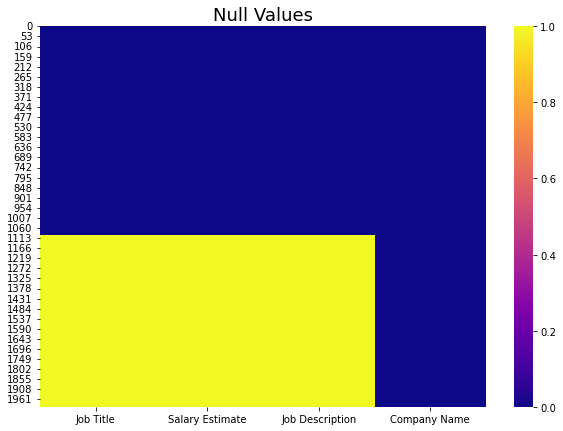

In [7]:
# Add title to the Heat map
fig, ax = plt.subplots(figsize=(10,7))
title = "Null Values"
# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=18)
ttl = ax.title
ttl.set_position([0.5,1.05])
null_Values=df[["Job Title","Salary Estimate","Job Description","Company Name"]]
sns.heatmap(null_Values.isnull(),cmap="plasma")

### Targeting Null Values.

In [8]:
new_df = df.fillna({"Job Title":"Data Analyst","Salary Estimate":" $26K-$47K (Google)","Job Description":"Responsible for Analyzing data using statistical techniques, implementing and maintaining databases and data visualization."})
new_df

,Sr.No,First Name,Last Name,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,1,Mechelle,Stoneman,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,1
1,2,Tyesha,Freitag,Quality Data Analyst,$37K-$66K (Glassdoor),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,3,Dean,Stoecker,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor),Weâ€™re looking for a Senior Data Analyst who ...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,4,Annelle,Pickney,Data Analyst,$37K-$66K (Glassdoor),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,5,Margareta,Tacy,Reporting Data Analyst,$37K-$66K (Glassdoor),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Myrl,Eriksen,Data Analyst,$26K-$47K (Google),Responsible for Analyzing data using statistic...,-1.0,V3 Talent Partners Inc.,"San Mateo, CA","Los Angeles, CA",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,-1
1996,1997,Oleta,Moret,Data Analyst,$26K-$47K (Google),Responsible for Analyzing data using statistic...,3.7,Arkhya Tech\n3.7,"San Francisco, CA","Herndon, VA",1 to 50 employees,2017,Company - Private,IT Services,Information Technology,Unknown / Non-Applicable,-1,-1
1997,1998,Carita,Fifield,Data Analyst,$26K-$47K (Google),Responsible for Analyzing data using statistic...,-1.0,Wish.com,"San Francisco, CA","Keswick, VA",1 to 50 employees,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,-1
1998,1999,Glory,Mckeown,Data Analyst,$26K-$47K (Google),Responsible for Analyzing data using statistic...,3.2,Stem Inc\n3.2,"Millbrae, CA","Millbrae, CA",51 to 200 employees,2009,Company - Private,Energy,"Oil, Gas, Energy & Utilities",$25 to $50 million (USD),-1,-1


In [9]:
new_df.isnull().sum()

Sr.No                0
First Name           0
Last Name            0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

### Minimized the Null Values.

<AxesSubplot:title={'center':'Null Values'}>

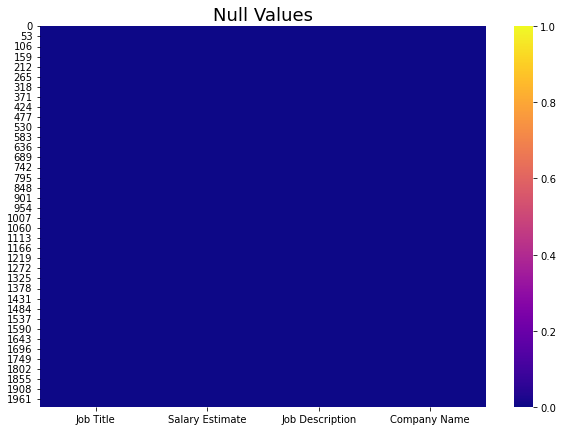

In [10]:
# Add title to the Heat map
fig, ax = plt.subplots(figsize=(10,7))
title = "Null Values"
# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=18)
ttl = ax.title
ttl.set_position([0.5,1.05])
n=new_df[["Job Title","Salary Estimate","Job Description","Company Name"]]
sns.heatmap(n.isnull(),cmap="plasma")

### Feature selection and Extraction.

In [11]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sr.No              2000 non-null   int64  
 1   First Name         2000 non-null   object 
 2   Last Name          2000 non-null   object 
 3   Job Title          2000 non-null   object 
 4   Salary Estimate    2000 non-null   object 
 5   Job Description    2000 non-null   object 
 6   Rating             2000 non-null   float64
 7   Company Name       1999 non-null   object 
 8   Location           2000 non-null   object 
 9   Headquarters       2000 non-null   object 
 10  Size               2000 non-null   object 
 11  Founded            2000 non-null   int64  
 12  Type of ownership  2000 non-null   object 
 13  Industry           2000 non-null   object 
 14  Sector             2000 non-null   object 
 15  Revenue            2000 non-null   object 
 16  Competitors        2000 

In [12]:
new_df['Full Name'] = new_df['First Name']+' '+new_df['Last Name']

In [13]:
new_df.drop(['First Name','Last Name'],axis=1,inplace=True)

In [14]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sr.No              2000 non-null   int64  
 1   Job Title          2000 non-null   object 
 2   Salary Estimate    2000 non-null   object 
 3   Job Description    2000 non-null   object 
 4   Rating             2000 non-null   float64
 5   Company Name       1999 non-null   object 
 6   Location           2000 non-null   object 
 7   Headquarters       2000 non-null   object 
 8   Size               2000 non-null   object 
 9   Founded            2000 non-null   int64  
 10  Type of ownership  2000 non-null   object 
 11  Industry           2000 non-null   object 
 12  Sector             2000 non-null   object 
 13  Revenue            2000 non-null   object 
 14  Competitors        2000 non-null   object 
 15  Easy Apply         2000 non-null   int64  
 16  Full Name          2000 

In [15]:
cols = ['Full Name','Job Title','Salary Estimate','Rating','Company Name','Location','Headquarters','Size','Type of ownership','Industry','Sector','Revenue']
new_df=new_df[cols]


### Dataset with final features (Blueprint).

In [16]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Full Name          2000 non-null   object 
 1   Job Title          2000 non-null   object 
 2   Salary Estimate    2000 non-null   object 
 3   Rating             2000 non-null   float64
 4   Company Name       1999 non-null   object 
 5   Location           2000 non-null   object 
 6   Headquarters       2000 non-null   object 
 7   Size               2000 non-null   object 
 8   Type of ownership  2000 non-null   object 
 9   Industry           2000 non-null   object 
 10  Sector             2000 non-null   object 
 11  Revenue            2000 non-null   object 
dtypes: float64(1), object(11)
memory usage: 187.6+ KB


### Checking for unusual data.
(In our data set we have -1 , Unknown , Unknown/Not Applicable values)

In [17]:
new_df.isnull().sum()

Full Name            0
Job Title            0
Salary Estimate      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
dtype: int64

In [18]:
(new_df==('Unknown')).sum()

Full Name             0
Job Title             0
Salary Estimate       0
Rating                0
Company Name          0
Location              0
Headquarters          0
Size                 41
Type of ownership    15
Industry              0
Sector                0
Revenue               0
dtype: int64

In [19]:
(new_df==(-1)).sum()

Full Name              0
Job Title              0
Salary Estimate        0
Rating               249
Company Name           0
Location               0
Headquarters         152
Size                 145
Type of ownership    145
Industry             324
Sector               324
Revenue              145
dtype: int64

In [20]:
(new_df==('Unknown / Non-Applicable')).sum()

Full Name              0
Job Title              0
Salary Estimate        0
Rating                 0
Company Name           0
Location               0
Headquarters           0
Size                   0
Type of ownership      0
Industry               0
Sector                 0
Revenue              559
dtype: int64

### Replacing ( -1 , 'Unknown' , 'Unknown / Not Applicable' ) data values with meaning full values.

In [21]:
new_df['Rating'].replace([-1],[1],inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9064\2563355716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Rating'].replace([-1],[1],inplace=True)


In [22]:
new_df['Headquarters'].replace([-1],['Unknown'],inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9064\1376165337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Headquarters'].replace([-1],['Unknown'],inplace=True)


In [23]:
new_df['Size'].replace([-1,'Unknown'],['1 to 50 employees','1 to 50 employees'],inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9064\1729576983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Size'].replace([-1,'Unknown'],['1 to 50 employees','1 to 50 employees'],inplace=True)


In [24]:
new_df['Type of ownership'].replace([-1],['Unknown'],inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9064\2809096510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Type of ownership'].replace([-1],['Unknown'],inplace=True)


In [25]:
new_df['Industry'].replace([-1],['Unknown'],inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9064\3249340641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Industry'].replace([-1],['Unknown'],inplace=True)


In [26]:
new_df['Sector'].replace([-1],['Unknown'],inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9064\3826228190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Sector'].replace([-1],['Unknown'],inplace=True)


In [27]:
new_df['Revenue'].replace(['Unknown / Non-Applicable'],['Unknown'],inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9064\144948543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Revenue'].replace(['Unknown / Non-Applicable'],['Unknown'],inplace=True)


In [28]:
new_df['Revenue'].replace([-1],['Unknown'],inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9064\2377745159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Revenue'].replace([-1],['Unknown'],inplace=True)


### Checking, whether the meaningless values are replaced with meaningfull values.

In [29]:
(new_df==(-1)).sum()

Full Name            0
Job Title            0
Salary Estimate      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
dtype: int64

In [30]:
(new_df==('Unknown')).sum()

Full Name              0
Job Title              0
Salary Estimate        0
Rating                 0
Company Name           0
Location               0
Headquarters         152
Size                   0
Type of ownership    160
Industry             324
Sector               324
Revenue              704
dtype: int64

In [31]:
new_df.shape

(2000, 12)

### Changing column names and rearranging them for futher visualization.

In [32]:
new_df.rename(columns={'Full Name':'Full_Name','Job Title':'Job_Title','Salary Estimate':'Salary_Estimate','Company Name':'Company_Name','Type of ownership':'Type_of_ownership'},inplace = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9064\1443452660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.rename(columns={'Full Name':'Full_Name','Job Title':'Job_Title','Salary Estimate':'Salary_Estimate','Company Name':'Company_Name','Type of ownership':'Type_of_ownership'},inplace = True)


In [33]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Full_Name          2000 non-null   object 
 1   Job_Title          2000 non-null   object 
 2   Salary_Estimate    2000 non-null   object 
 3   Rating             2000 non-null   float64
 4   Company_Name       1999 non-null   object 
 5   Location           2000 non-null   object 
 6   Headquarters       2000 non-null   object 
 7   Size               2000 non-null   object 
 8   Type_of_ownership  2000 non-null   object 
 9   Industry           2000 non-null   object 
 10  Sector             2000 non-null   object 
 11  Revenue            2000 non-null   object 
dtypes: float64(1), object(11)
memory usage: 187.6+ KB


## Data Visualization.

### 1) Ratings over Employee Size.

<AxesSubplot:xlabel='Rating', ylabel='Size'>

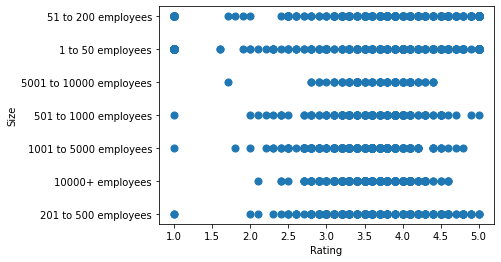

In [34]:
new_df.plot.scatter(x='Rating',y='Size',s=50)

### Replacing values with suitable values for scatter plot.

In [35]:
new_df['Revenue'].replace(['$100 to $500 million (USD)', '$2 to $5 billion (USD)', 'Unknown',
       '$50 to $100 million (USD)', '$1 to $2 billion (USD)',
       '$5 to $10 billion (USD)', '$1 to $5 million (USD)',
       '$25 to $50 million (USD)', '$10+ billion (USD)',
       'Less than $1 million (USD)', '$10 to $25 million (USD)',
       '$500 million to $1 billion (USD)', '$5 to $10 million (USD)'],[100,2000,1,50,1000,5000,1,25,10000,0.75,10,500,5],inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9064\3371851168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Revenue'].replace(['$100 to $500 million (USD)', '$2 to $5 billion (USD)', 'Unknown',


In [36]:
new_df.Revenue.unique()

array([1.0e+02, 2.0e+03, 1.0e+00, 5.0e+01, 1.0e+03, 5.0e+03, 2.5e+01,
       1.0e+04, 7.5e-01, 1.0e+01, 5.0e+02, 5.0e+00])

### 2) Revenue over Size.

<AxesSubplot:xlabel='Revenue', ylabel='Size'>

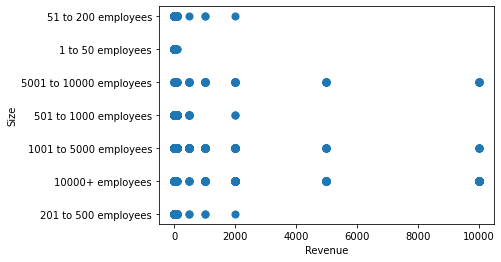

In [37]:
new_df.plot.scatter(x='Revenue',y='Size',s=50)

### 3) Revenue and Rating Over Various Sectors.

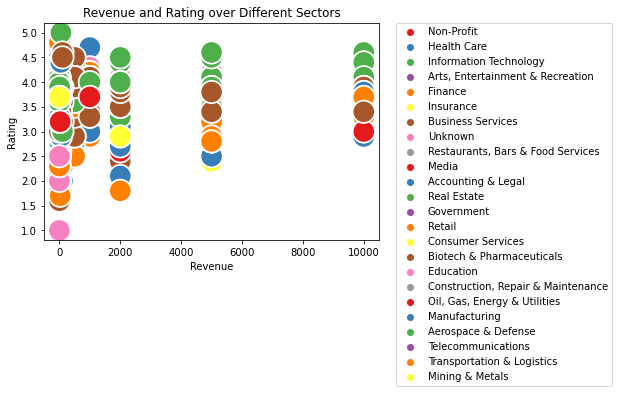

In [38]:
sns.scatterplot(x='Revenue', y='Rating', hue='Sector', palette="Set1", data=new_df,s=500).set(title='Revenue and Rating over Different Sectors')
plt.legend(bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0)
plt.show()

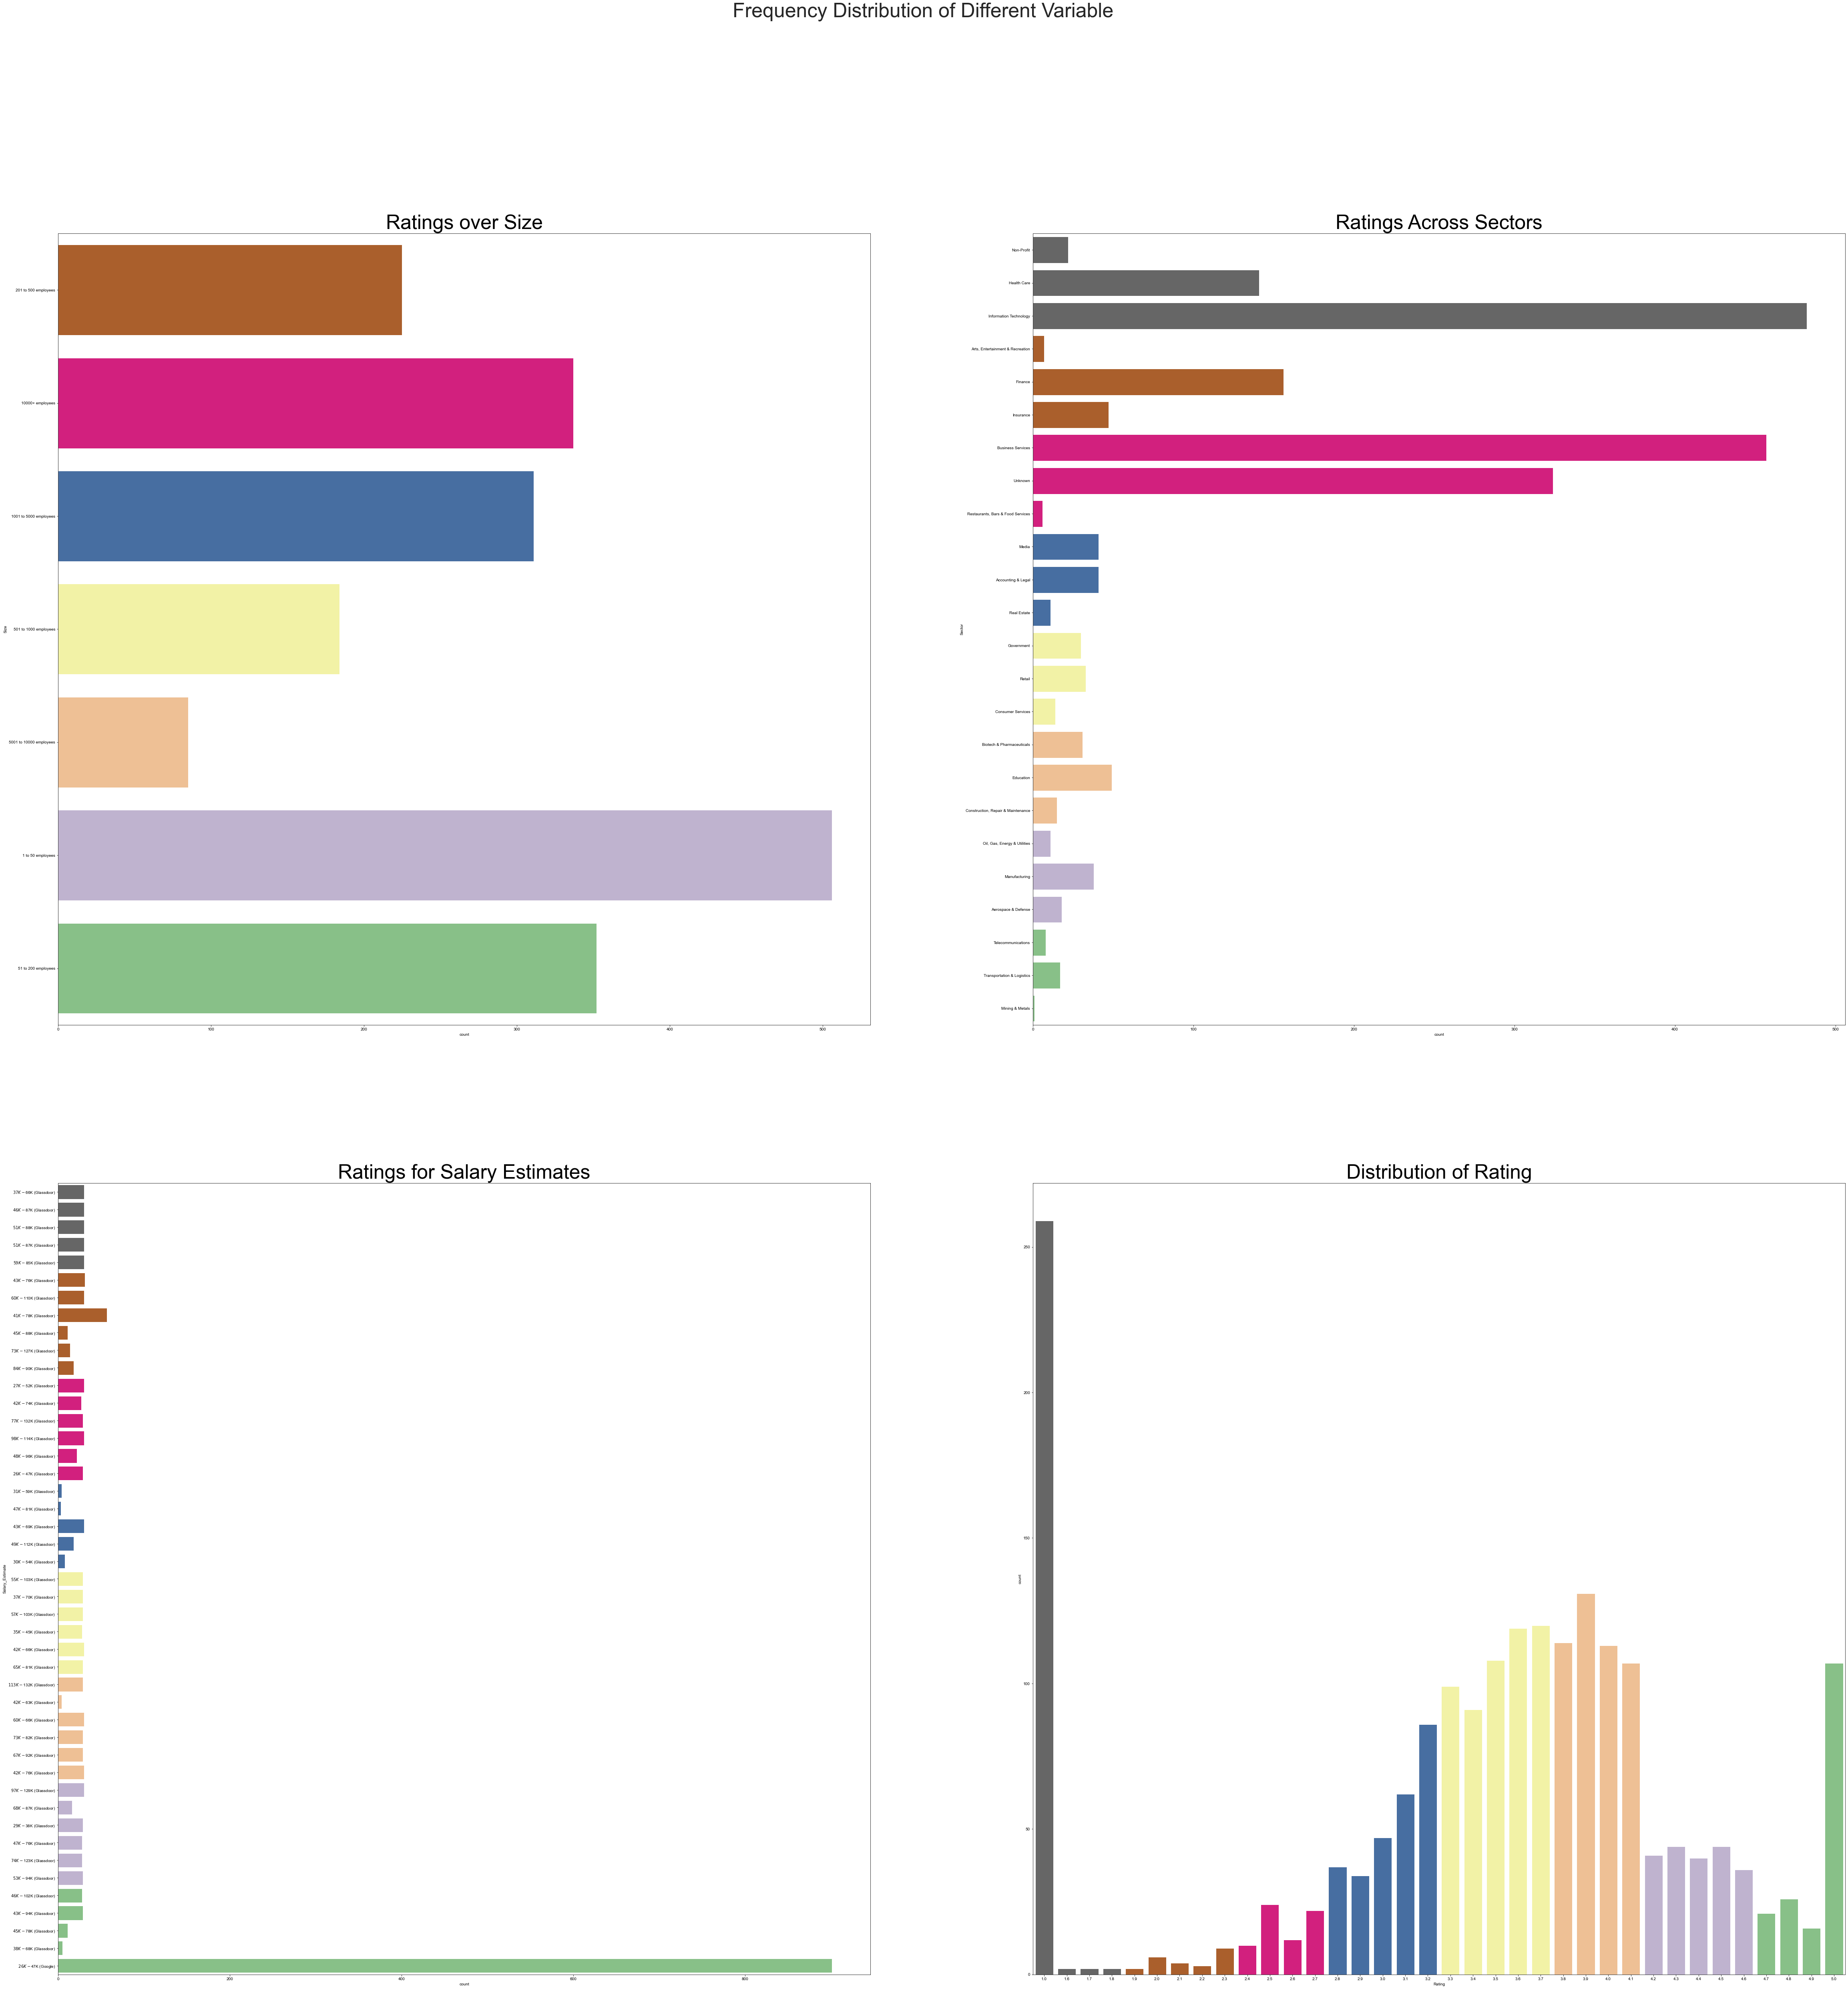

In [39]:
fig, axarr = plt.subplots(2,2, figsize=(80,80), facecolor='w', edgecolor='k')
sns.set(style="white",font_scale=5)
sns.countplot(y='Size',data = new_df, ax=axarr[0][0], palette="Accent_r")
axarr[0][0].set_title('Ratings over Size',fontsize=50)
sns.countplot(y='Sector',data = new_df, ax=axarr[0][1], palette="Accent_r")
axarr[0][1].set_title('Ratings Across Sectors',fontsize=50)
sns.countplot(y='Salary_Estimate',data = new_df,ax=axarr[1][0], palette="Accent_r")
axarr[1][0].set_title('Ratings for Salary Estimates',fontsize=50)
sns.countplot(x='Rating',data = new_df, ax=axarr[1][1], palette="Accent_r")
axarr[1][1].set_title('Distribution of Rating',fontsize=50)
fig.suptitle('Frequency Distribution of Different Variable', fontsize=50);

## Bar Plots

### 1) Size Over Ratings.

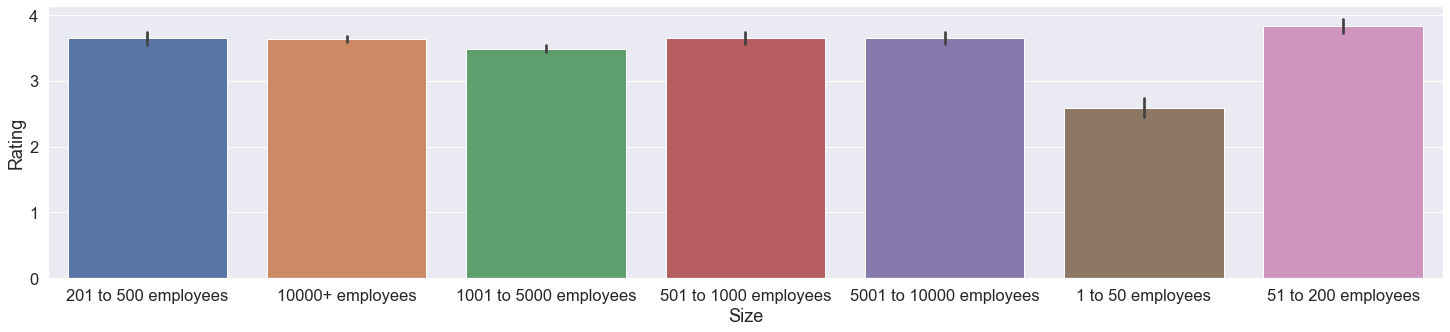

In [40]:
sns.set(rc={'figure.figsize':(25,5)})
sns.set(font_scale=1.5)
sns.barplot(x=new_df['Size'],y=new_df['Rating'])
plt.show()

### 3)Revenue Over Ratings.

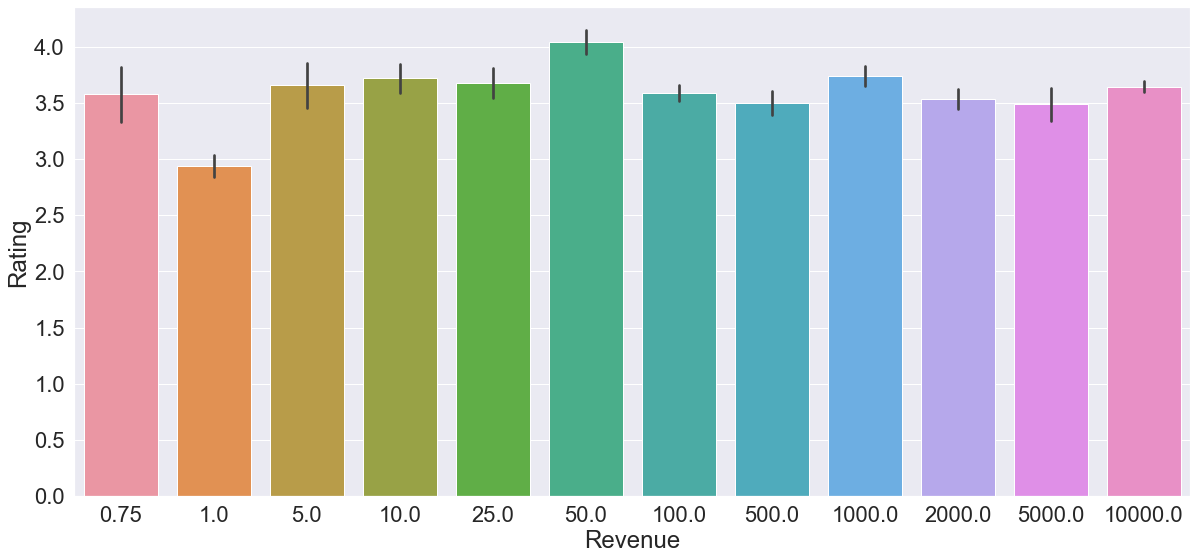

In [41]:
sns.set(rc={'figure.figsize':(20,9)})
sns.set(font_scale=2)
sns.barplot(x=new_df['Revenue'],y=new_df['Rating'])
plt.show()

### 4)Sector over Ratings.

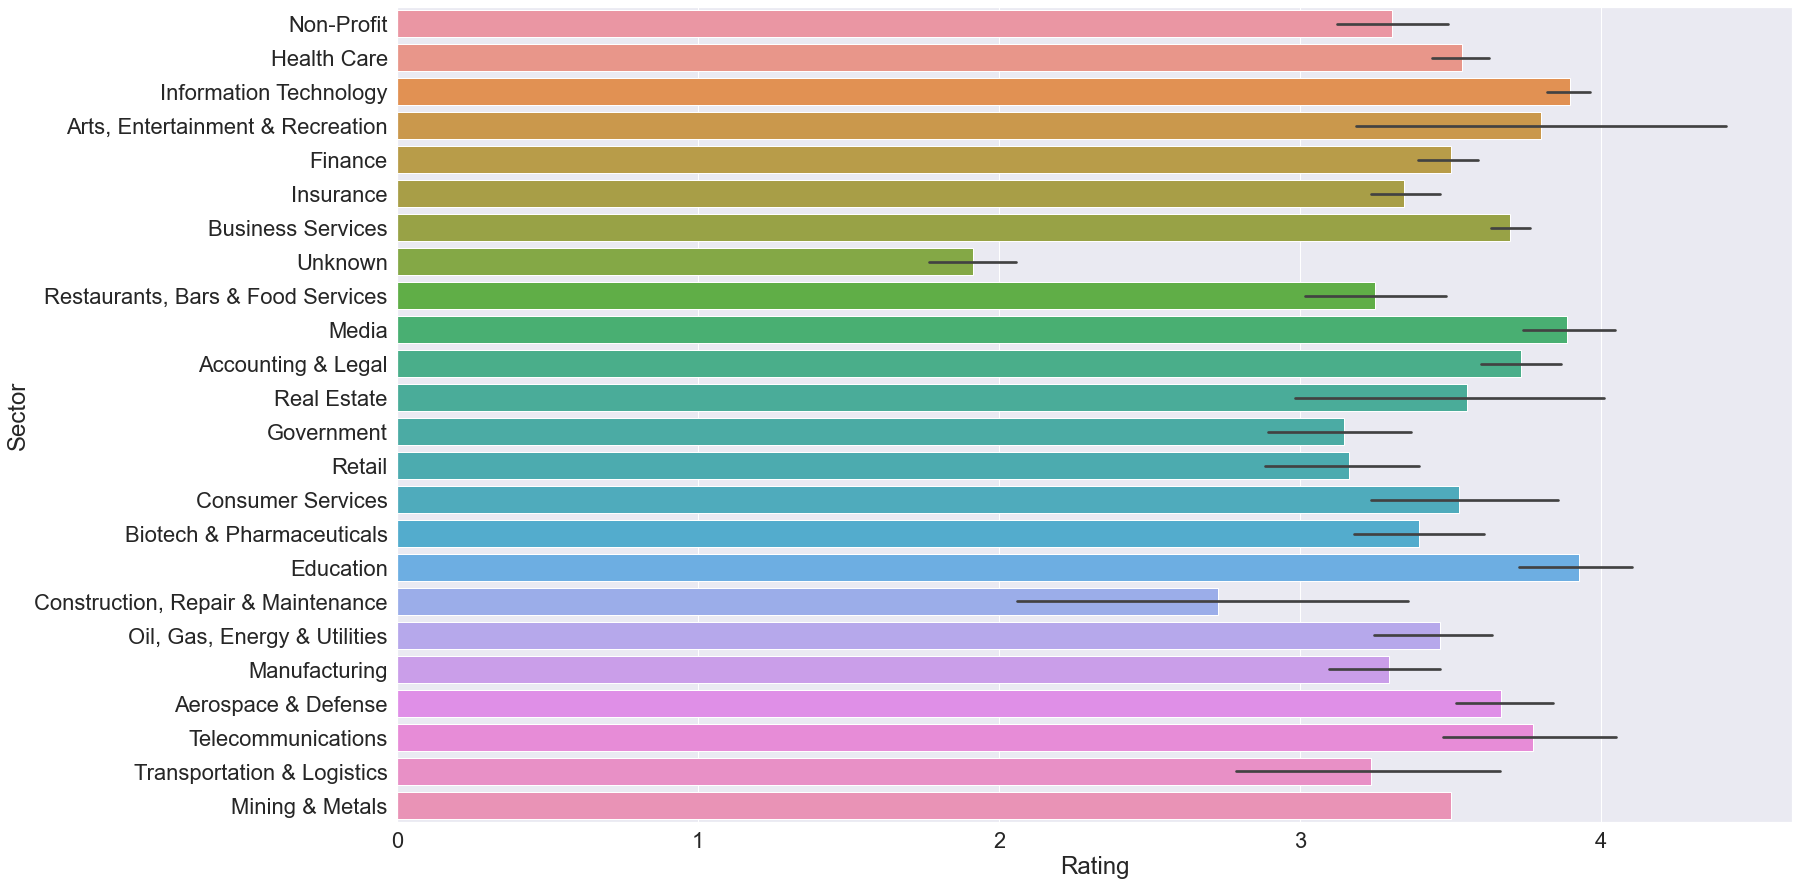

In [42]:
sns.set(rc={'figure.figsize':(25,15)})
sns.set(font_scale=2)
sns.barplot(x=new_df['Rating'],y=new_df['Sector'])
plt.show()

### 5)Salary Over Ratings.

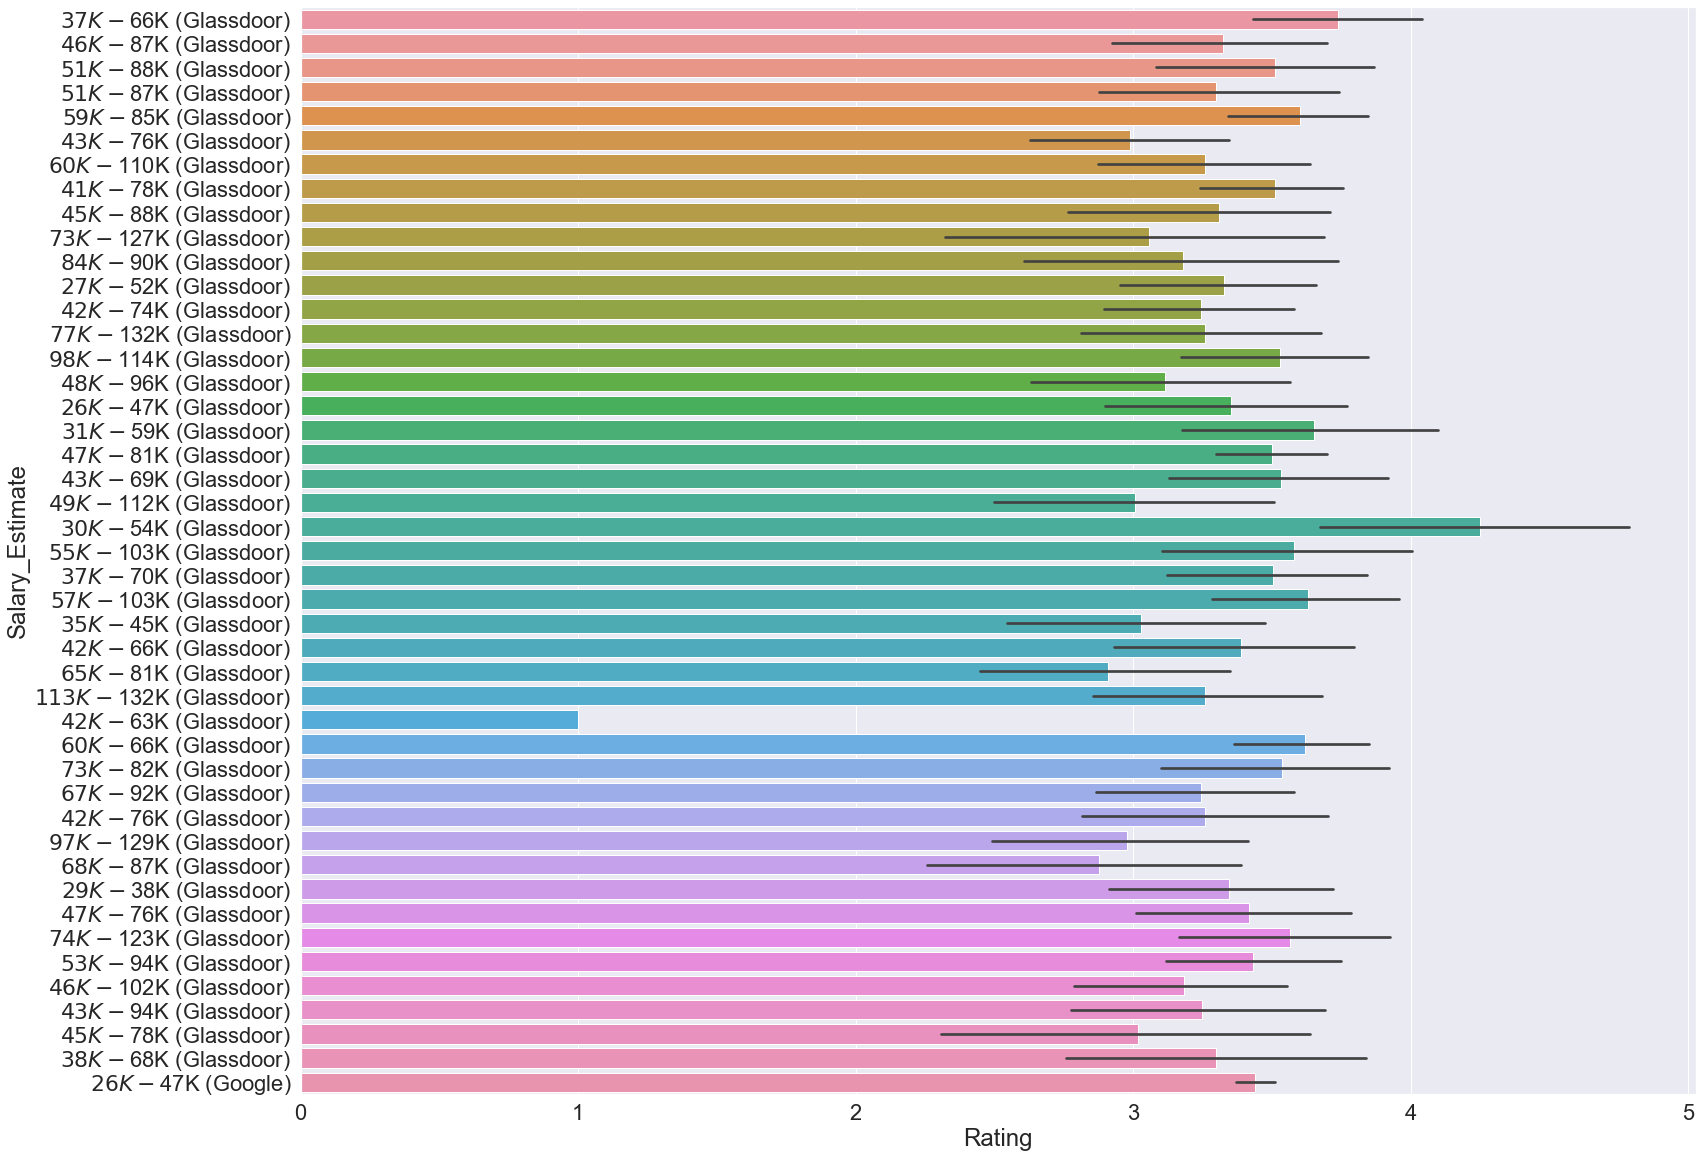

In [43]:
sns.set(rc={'figure.figsize':(25,20)})
sns.set(font_scale=2)
sns.barplot(x=new_df['Rating'],y=new_df['Salary_Estimate'])
plt.show()

## Loading Dataset which showing Scope.

####BluePrint

In [44]:
new_df__ = pd.read_excel("C:\\Users\\DELL\\Desktop\\Scope.xlsx")

## Scope For Data Analyst across countries.

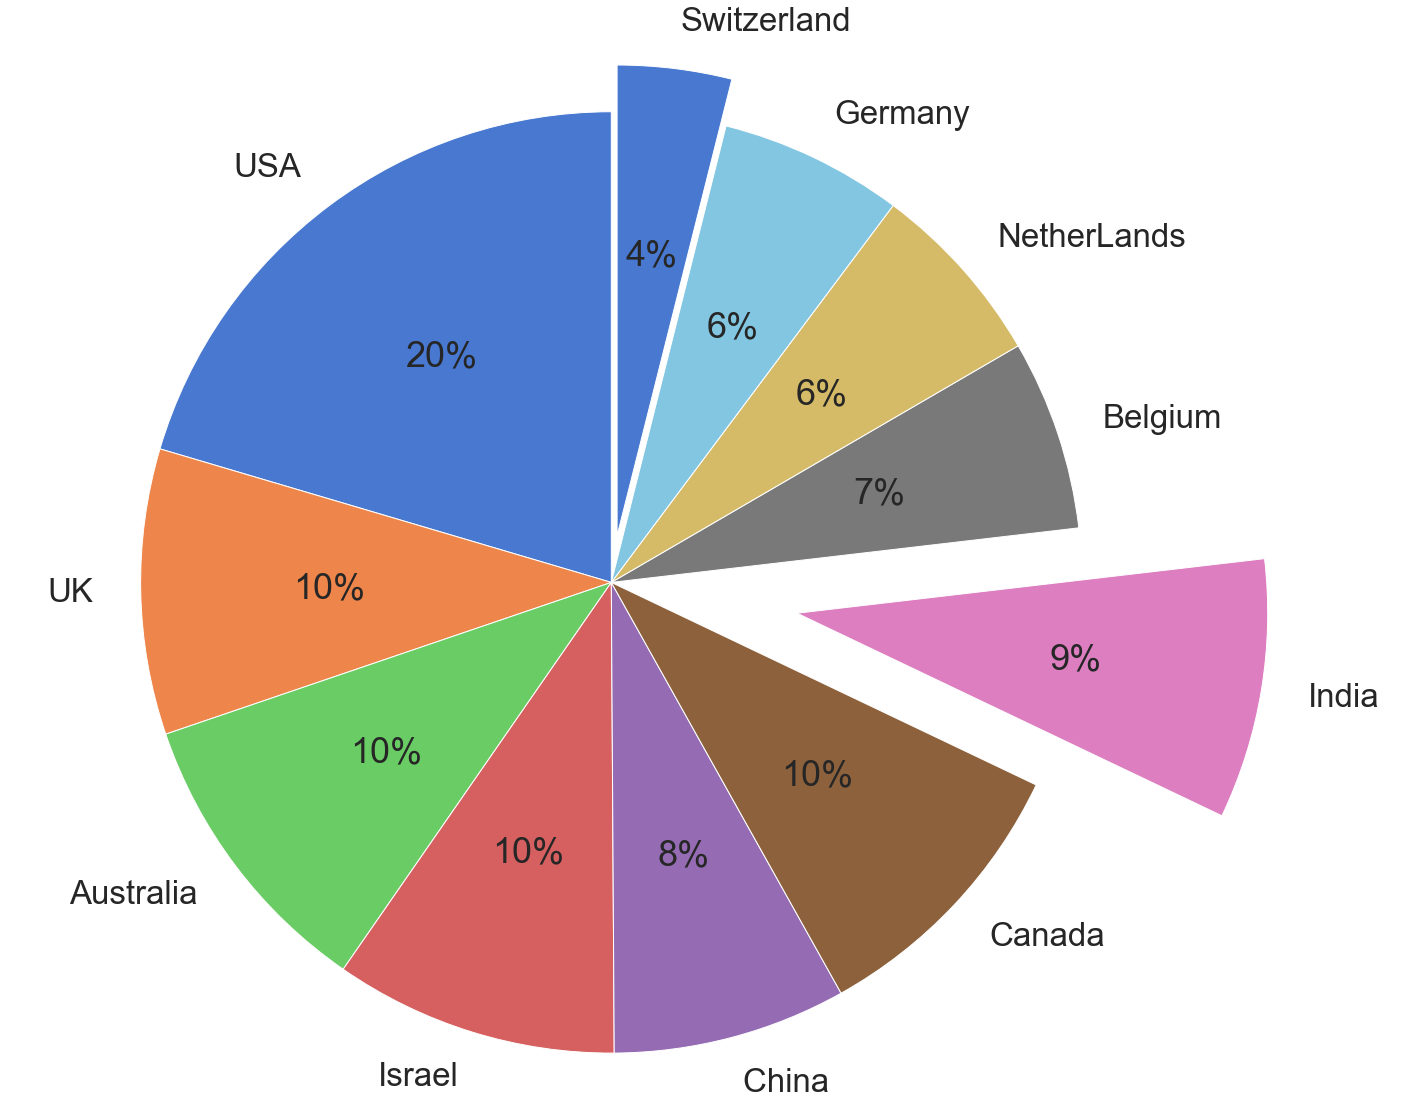

In [45]:
data = new_df__['Salaries(USD)']
keys = new_df__['Countries']
explode = [0, 0, 0, 0, 0, 0, 0.4, 0, 0, 0, 0.1]
plt.style.use('ggplot')
palette_color = sns.color_palette('muted')
sns.set_theme(font="arial", font_scale= 3)
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color,
        explode=explode,autopct='%.0f%%',startangle=90)
plt.axis('equal') 
# displaying chart
plt.show()